# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

As a Data Scientist working for Airbnb, you have been tasked to create a model that
predicts Airbnb rental prices for the city of Amsterdam. Popularity for Airbnbs in
Amsterdam has grown over the past years and you are required to build a solution the
would make optimal predictions.

### b) Defining the Metric for Success

The metrics we will use to evaluate our model are RMSE and R2 scores.

### c) Understanding the Context 

Airbnb is an American vacation rental online marketplace company based in San
Francisco, California, United States. Airbnb offers arrangement for lodging, primarily
homestays, or tourism experiences. The company does not own any of the real estate
listings, nor does it host events; it acts as a broker, receiving commissions from each
booking.

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data provided was relevant to answering the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [ ]:
# loading and previewing dataset
df = pd.read_csv('https://bit.ly/31fkomB')
df.sample(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11781,22027929,Beautiful upstairs apartment in the Pijp,22537997,Ferdau,NaN,De Pijp - Rivierenbuurt,52.35282,4.90406,Entire home/apt,400,2,26,2019-11-28,0.91,1,0
8975,17569218,Lovely canal view apartment in the Jordaan,12499698,Dirk & Quirien,NaN,Centrum-West,52.37543,4.88033,Entire home/apt,160,2,42,2020-01-03,1.15,1,8
2992,6225694,Trendy City Apartment in 'De Pijp',16060112,Roderick,NaN,De Pijp - Rivierenbuurt,52.35451,4.90242,Entire home/apt,109,1,8,2016-06-12,0.14,1,0


In [ ]:
df.shape

(19362, 16)

In [ ]:
# loading glossary
glossary = pd.read_csv('https://bit.ly/3klxdEn')
glossary

,room_id: A unique number identifying an Airbnb listing.
0,host_id: A unique number identifying an Airbnb host.
1,neighborhood: A subregion of the city or search area for which the survey is carried out. For some cities there is no neighbourhood information.
2,"room_type: One of “Entire home/apt”, “Private room”, or “Shared room”."
3,host_response_rate: The rate at which the particular host responds to the customers.
4,"price: The price (in $US) for a night stay. In early surveys, there may be some values that were recorded by month."
5,accomodates: The number of guests a listing can accommodate.
6,bathrooms: The number of bathrooms a listing offers.
7,bedrooms: The number of bedrooms a listing offers.
8,beds: The number of beds a listing offers.
9,"minimum_nights: The minimum stay for a visit, as posted by the host."


In [ ]:
glossary = pd.read_csv('https://bit.ly/3klxdEn', header = None)
glossary

,0
0,room_id: A unique number identifying an Airbnb listing.
1,host_id: A unique number identifying an Airbnb host.
2,neighborhood: A subregion of the city or search area for which the survey is carried out. For some cities there is no neighbourhood information.
3,"room_type: One of “Entire home/apt”, “Private room”, or “Shared room”."
4,host_response_rate: The rate at which the particular host responds to the customers.
5,"price: The price (in $US) for a night stay. In early surveys, there may be some values that were recorded by month."
6,accomodates: The number of guests a listing can accommodate.
7,bathrooms: The number of bathrooms a listing offers.
8,bedrooms: The number of bedrooms a listing offers.
9,beds: The number of beds a listing offers.


In [ ]:
# dropping the 'name' variable
df.drop(columns = ['name'], inplace = True)

In [ ]:
# checking dataset shape
df.shape

(19362, 15)

In [ ]:
# checking data types
df.dtypes

id                                  int64
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(19362, 15)

In [ ]:
# checking for missing data
df.isna().sum()

id                                    0
host_id                               0
host_name                             4
neighbourhood_group               19362
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2284
reviews_per_month                  2284
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# dropping the 'neighbourhood_group' variable, and the records with missing values for 'last_review'
# and 'reviews_per_month'
df.drop(columns = ['neighbourhood_group'], inplace = True)
df.dropna(inplace = True)

# confirming we have no null values
df.isnull().sum()

id                                0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.shape

(17075, 14)

In [ ]:
# get the unique value of each variable to ensure there are no anomalies
cols = df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique variables:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: id
Number of unique variables: 17075
[    2818    20168    25428 ... 42947577 43031829 43076538]

Variable: host_id
Number of unique variables: 15182
[     3159     59484     56142 ... 341432744 148433830 342882021]

Variable: host_name
Number of unique variables: 5382
['Daniel' 'Alexander' 'Joan' ... 'The Niu Fender' 'Marcela' 'Addie']

Variable: neighbourhood
Number of unique variables: 22
['Oostelijk Havengebied - Indische Buurt' 'Centrum-Oost' 'Centrum-West'
 'Zuid' 'De Pijp - Rivierenbuurt' 'De Baarsjes - Oud-West' 'Bos en Lommer'
 'Westerpark' 'Oud-Oost' 'Noord-West' 'Slotervaart' 'Oud-Noord'
 'Geuzenveld - Slotermeer' 'Watergraafsmeer' 'IJburg - Zeeburgereiland'
 'Noord-Oost' 'Gaasperdam - Driemond' 'Buitenveldert - Zuidas'
 'Bijlmer-Oost' 'De Aker - Nieuw Sloten' 'Osdorp' 'Bijlmer-Centrum']

Variable: latitude
Number of unique variables: 5720
[52.36575 52.36509 52.37297 ... 52.40828 52.40598 52.38885]

Variable: longitude
Number of unique variables: 9193
[4.94142 4.89

In [ ]:
df['host_id'].value_counts()

1464510     36
65859990    34
7594884     31
14874061    29
44168250    21
            ..
5825478      1
2532286      1
17775549     1
6099896      1
12859807     1
Name: host_id, Length: 15182, dtype: int64

In [ ]:
df.query('host_id == 65859990')

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8232,16060223,65859990,Martijn,Zuid,52.35072,4.85151,Entire home/apt,133,3,11,2020-01-03,0.27,34,0
8341,16263796,65859990,Martijn,Centrum-West,52.38368,4.88447,Entire home/apt,153,3,26,2019-01-03,0.65,34,0
9122,17917198,65859990,Martijn,Centrum-West,52.37206,4.88035,Private room,126,2,88,2020-03-08,2.37,34,167
9375,18285386,65859990,Martijn,De Baarsjes - Oud-West,52.35934,4.85073,Entire home/apt,147,2,17,2018-07-16,0.47,34,4
9409,18337911,65859990,Martijn,Oud-Oost,52.36355,4.92517,Entire home/apt,71,2,10,2017-11-01,0.28,34,0
9492,18456010,65859990,Martijn,Centrum-West,52.37820,4.89373,Entire home/apt,215,2,24,2019-11-10,0.68,34,2
10546,19977068,65859990,Martijn,Oud-Oost,52.35472,4.92636,Entire home/apt,155,2,8,2019-11-12,0.24,34,0
10572,20025472,65859990,Martijn,Westerpark,52.37310,4.87256,Entire home/apt,81,2,12,2017-09-29,0.36,34,0
10703,20206717,65859990,Martijn,Centrum-West,52.37143,4.87950,Entire home/apt,100,2,9,2017-10-05,0.28,34,0
10810,20402219,65859990,Martijn,Centrum-West,52.38023,4.89248,Entire home/apt,166,2,20,2019-08-25,0.64,34,0


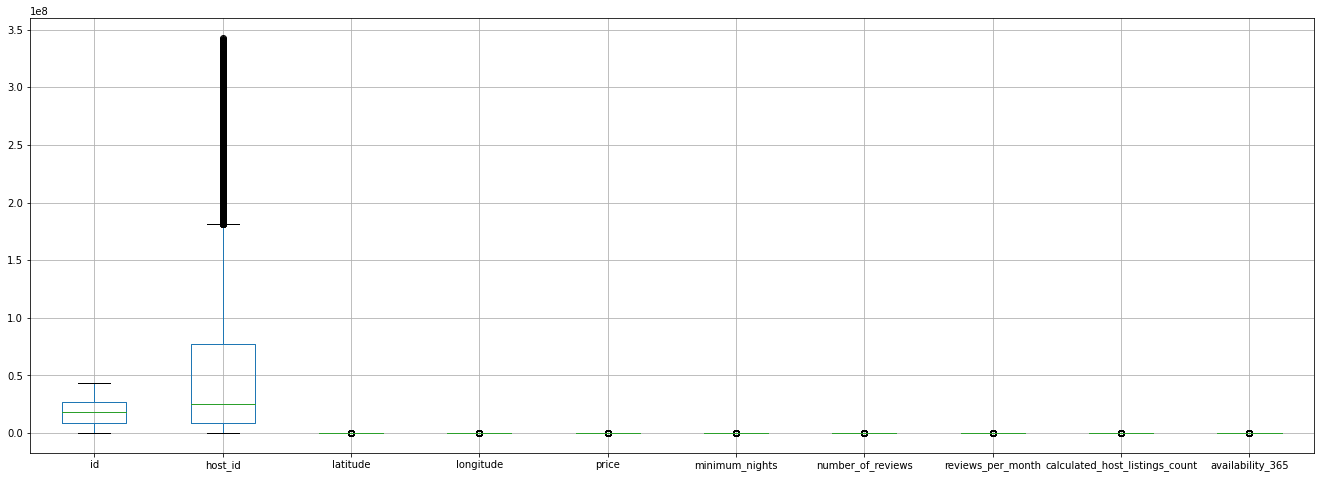

In [ ]:
# visualizing the distribution of outliers
plt.figure(figsize = (23, 8))
df.boxplot()
plt.show()

In [ ]:
# getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(3)

(8544, 14)


,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
15807,33059529,8101229,Daniela,Watergraafsmeer,52.35206,4.94506,Private room,40,1,33,2020-03-08,2.58,1,0
309,660856,3336575,Maaike,Watergraafsmeer,52.35526,4.93451,Entire home/apt,325,5,34,2019-08-04,0.38,1,25
6558,13419687,13405827,Cap Homes,De Baarsjes - Oud-West,52.36140,4.85831,Entire home/apt,235,7,13,2020-02-24,0.61,19,336


In [ ]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 2)

50.04

It would be tricky to drop the records with outliers since that will reduce our dataset by half so we will leave them there. However, we will drop the host_id variable later on, right before modeling.

# <font color='#2F4F4F'>3. Data Analysis</font>

## 3.1 Univariate Analysis 

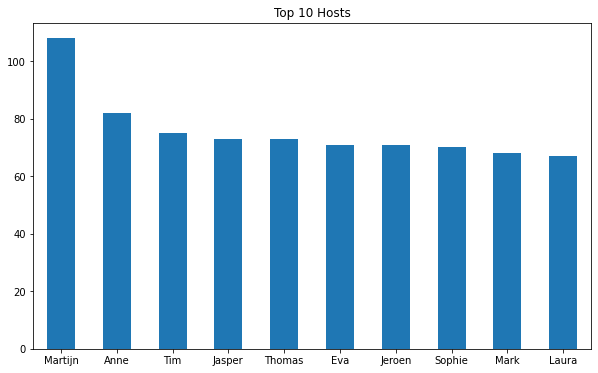

In [ ]:
# getting the top 10 most common hosts
plt.figure(figsize = (10, 6))
df.host_name.value_counts()[:10].plot(kind = 'bar', rot = 0)
plt.title("Top 10 Hosts")
plt.show()

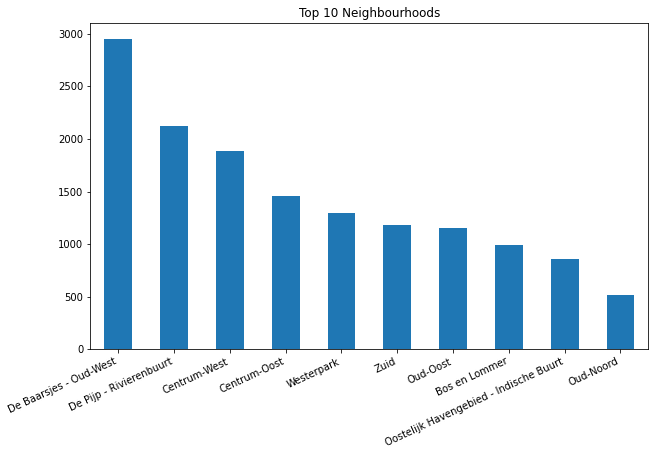

In [ ]:
# getting the top 10 most common neighbourhoods
plt.figure(figsize = (10, 6))
df.neighbourhood.value_counts()[:10].plot(kind = 'bar', rot = 25)
plt.xticks(ha = "right")
plt.title("Top 10 Neighbourhoods")
plt.show()

In [ ]:
df.room_type.value_counts()

Entire home/apt    13308
Private room        3497
Hotel room           232
Shared room           38
Name: room_type, dtype: int64

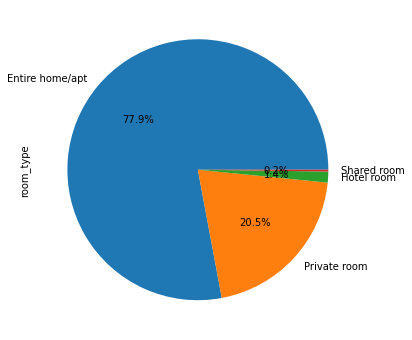

In [ ]:
# getting the most common room types
plt.figure(figsize = (6, 6))
labels = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
df.room_type.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', labels = labels)
plt.show()

Most popular room type for airbnb rental was the entire home/apartment.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


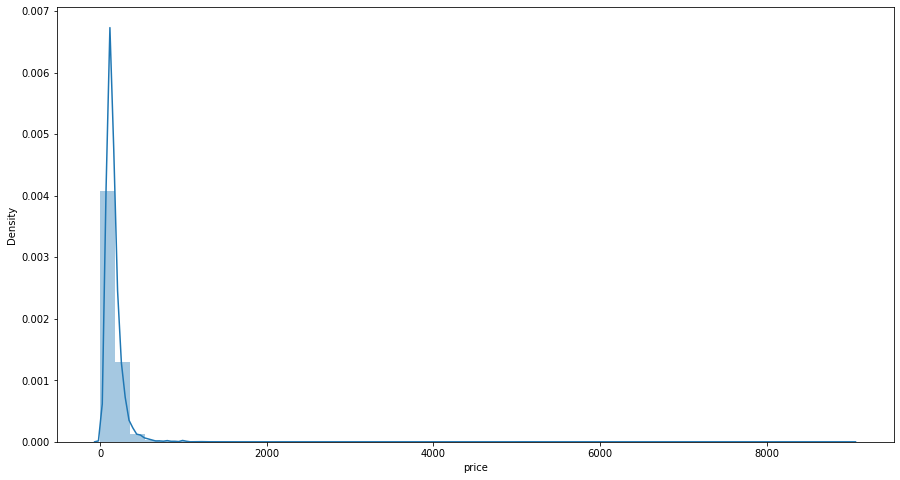

In [ ]:
# distribution of price
plt.figure(figsize = (15,8))
sns.distplot(df['price'])
plt.show()

Most prices range under 1000

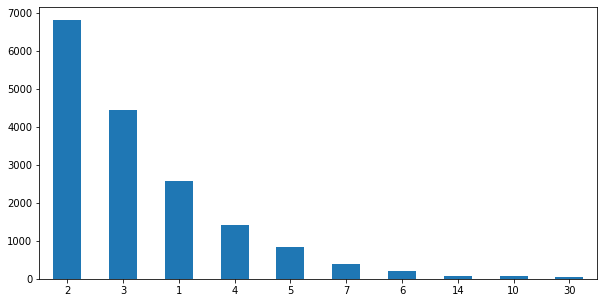

In [ ]:
# getting the top 10 most common minimum number of nights to spend
plt.figure(figsize = (10, 5))
df.minimum_nights.value_counts()[:10].plot(kind = 'bar', rot = 0)
plt.show()

Most customers rented the airbnbs for 2 - 3 nights.





## 3.2 Bivariate Analysis

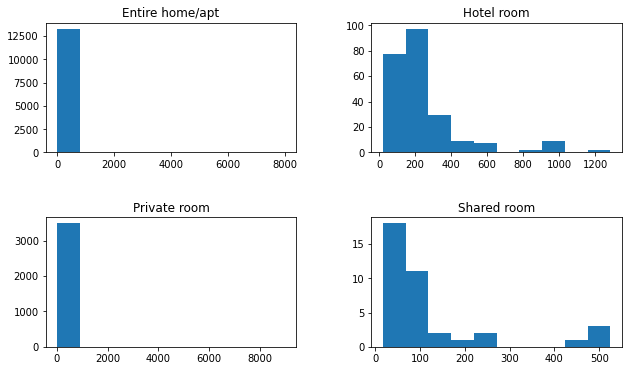

In [ ]:
# price by room type
df.hist('price', by = 'room_type', rot = 0, figsize = (10, 6))
plt.show()

In [ ]:
# average price by neighbourhood
df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)

neighbourhood
Centrum-West                              203.653397
Centrum-Oost                              190.534247
Zuid                                      178.813243
Oud-Noord                                 168.763566
De Pijp - Rivierenbuurt                   166.601787
IJburg - Zeeburgereiland                  157.723077
Westerpark                                151.241140
De Baarsjes - Oud-West                    149.376228
Oud-Oost                                  144.606957
Watergraafsmeer                           141.199125
Buitenveldert - Zuidas                    137.690355
Oostelijk Havengebied - Indische Buurt    135.101163
Noord-Oost                                130.495833
Noord-West                                126.318885
Bos en Lommer                             122.525304
De Aker - Nieuw Sloten                    121.268908
Slotervaart                               119.791549
Geuzenveld - Slotermeer                   113.937143
Osdorp                          

Airbnbs in Centrum -west and Centrum_oost neighbourhoods have the highest average prices, while those in Bijlmer - Centrum and Bijlmer -Oost neighbourhoods have the lowest average prices

In [ ]:
# average price by minimum nights
df.groupby('minimum_nights')['price'].mean().sort_values(ascending = False)

minimum_nights
365     3000.000000
200      999.000000
99       999.000000
52       429.000000
30       331.551020
222      300.000000
27       275.000000
48       250.000000
31       243.750000
150      203.000000
21       201.761905
15       197.888889
1000     185.000000
240      180.000000
28       175.900000
7        174.760526
300      170.500000
180      169.250000
3        166.936544
14       163.476923
38       159.000000
4        158.828311
45       157.500000
5        155.676190
1        154.149670
60       152.071429
2        151.557365
24       150.000000
22       150.000000
6        146.276923
59       146.250000
40       139.000000
9        136.250000
41       131.000000
20       130.185185
1001     130.000000
16       129.666667
100      127.000000
90       126.250000
10       125.709677
18       125.000000
8        120.730769
999      120.000000
29       120.000000
25       118.555556
12       118.083333
500      110.000000
50       110.000000
17       109.500000
95   

## 3.3 Feature Engineering

In [ ]:
# getting the average price per room type
df.groupby('room_type')['price'].mean().sort_values(ascending = False)

room_type
Hotel room         245.853448
Entire home/apt    169.179967
Shared room        123.000000
Private room       109.421504
Name: price, dtype: float64

In [ ]:
# adding to our dataset
df['avg_price_per_roomtype'] = df.groupby('room_type').price.transform('mean')
df.head(5)

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,avg_price_per_roomtype
0,2818,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.06,1,169,109.421504
1,20168,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.76,2,106,109.421504
2,25428,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132,169.179967
3,27886,97647,Flip,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,2.15,1,172,109.421504
4,28871,124245,Edwin,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,2.82,3,210,109.421504


In [ ]:
# getting the average price per neighbourhood
df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)

# adding to our dataset
df['avg_price_per_neighbourhood'] = df.groupby('neighbourhood').price.transform('mean')

# previewing our modified dataset
df.head(5)

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,avg_price_per_roomtype,avg_price_per_neighbourhood
0,2818,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.06,1,169,109.421504,135.101163
1,20168,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.76,2,106,109.421504,190.534247
2,25428,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132,169.179967,203.653397
3,27886,97647,Flip,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,2.15,1,172,109.421504,203.653397
4,28871,124245,Edwin,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,2.82,3,210,109.421504,203.653397


In [ ]:
# encoding 'room_type'
df = pd.get_dummies(df, columns=["room_type"])

df.head(5)

,id,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,avg_price_per_roomtype,avg_price_per_neighbourhood,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2818,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,59,3,278,2020-02-14,2.06,1,169,109.421504,135.101163,0,0,1,0
1,20168,59484,Alexander,Centrum-Oost,52.36509,4.89354,100,1,340,2020-04-09,2.76,2,106,109.421504,190.534247,0,0,1,0
2,25428,56142,Joan,Centrum-West,52.37297,4.88339,125,14,5,2020-02-09,0.18,1,132,169.179967,203.653397,1,0,0,0
3,27886,97647,Flip,Centrum-West,52.38761,4.89188,155,2,217,2020-03-02,2.15,1,172,109.421504,203.653397,0,0,1,0
4,28871,124245,Edwin,Centrum-West,52.36719,4.89092,75,2,332,2020-03-16,2.82,3,210,109.421504,203.653397,0,0,1,0


In [ ]:
df.columns

Index(['id', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'avg_price_per_roomtype',
       'avg_price_per_neighbourhood', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [ ]:
# loading glossary
glossary = pd.read_csv('https://bit.ly/3klxdEn')
glossary

,room_id: A unique number identifying an Airbnb listing.
0,host_id: A unique number identifying an Airbnb host.
1,neighborhood: A subregion of the city or search area for which the survey is carried out. For some cities there is no neighbourhood information.
2,"room_type: One of “Entire home/apt”, “Private room”, or “Shared room”."
3,host_response_rate: The rate at which the particular host responds to the customers.
4,"price: The price (in $US) for a night stay. In early surveys, there may be some values that were recorded by month."
5,accomodates: The number of guests a listing can accommodate.
6,bathrooms: The number of bathrooms a listing offers.
7,bedrooms: The number of bedrooms a listing offers.
8,beds: The number of beds a listing offers.
9,"minimum_nights: The minimum stay for a visit, as posted by the host."


In [ ]:
# dropping unneeded columns in preparation for modeling

df_new=df.drop(columns=['id','neighbourhood', 'host_name','calculated_host_listings_count','last_review'])
df_new.head(5)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,avg_price_per_roomtype,avg_price_per_neighbourhood,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,3159,52.36575,4.94142,59,3,278,2.06,169,109.421504,135.101163,0,0,1,0
1,59484,52.36509,4.89354,100,1,340,2.76,106,109.421504,190.534247,0,0,1,0
2,56142,52.37297,4.88339,125,14,5,0.18,132,169.179967,203.653397,1,0,0,0
3,97647,52.38761,4.89188,155,2,217,2.15,172,109.421504,203.653397,0,0,1,0
4,124245,52.36719,4.89092,75,2,332,2.82,210,109.421504,203.653397,0,0,1,0


In [ ]:
df_new.columns

Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'availability_365',
       'avg_price_per_roomtype', 'avg_price_per_neighbourhood',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

# <font color='#2F4F4F'>4. Data Modeling</font>

In [ ]:
# split into features (X) and label (Y)
from sklearn.model_selection import train_test_split

#selecting the features to use
X = df_new[['host_id','latitude', 'longitude',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'availability_365', 'avg_price_per_roomtype',
       'avg_price_per_neighbourhood', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']]
y = df_new['price']


In [ ]:
# split into 70-30 train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)

In [ ]:
#view train/test datasets sizes
print('X.shape :', X.shape)
print('X_train.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)

X.shape : (17075, 13)
X_train.shape : (11952, 13)
X_test.shape : (5123, 13)


In [ ]:
# scaling our features - Standardization

# Performing standardisation
from sklearn.preprocessing import StandardScaler

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)



For purposes of simplicity, we will work with the following regressors:
* Decision Tree Regressor
* Random Forest Regressor

## 4.1 Normal Modeling

In [ ]:
# loading our regressors

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# instantiating our regressors
rfr_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
dtr_regressor = DecisionTreeRegressor(random_state =0)

# fitting to our training data
rfr_regressor.fit(X_train, y_train)
dtr_regressor.fit(X_train, y_train)

# # making predictions
rfr_regressor_y_pred = rfr_regressor.predict(X_test)
dtr_regressor_y_pred = dtr_regressor.predict(X_test)

# # evaluating the RMSE scores
from sklearn import metrics 
print('Random Forest Regressor RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_regressor_y_pred)))
print('Decision Tree Regressor RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_regressor_y_pred)))

# # evaluating the R2 scores
from sklearn.metrics import r2_score

print('Random Forest Regressor r2_score:', r2_score(y_test, rfr_regressor_y_pred))
print('Decision Tree Regressor r2_score:', r2_score(y_test, dtr_regressor_y_pred))



Random Forest Regressor RMSE: 208.0245462826441
Decision Tree Regressor RMSE: 210.8049193798505
Random Forest Regressor r2_score: -0.04271170721035911
Decision Tree Regressor r2_score: -0.07077091389870205


In [ ]:
# 10% of target variable's mean
# YOUR CODE HERE

Record your observations.


R square can have a negative value when the model selected does not follow the trend of the data, therefore leading to a worse fit than the horizontal line. It is usually the case when there are constraints on either the intercept or the slope of the linear regression line.

## 4.2 Modeling with Grid Search

In [ ]:
# Print hyperparameters
from sklearn.ensemble import RandomForestRegressor
# Instantiate the model
rfr_regressor = RandomForestRegressor()
rfr_regressor.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor()>

In [ ]:
# setting our grid parameters - Random Forest Regressor

#start by importing required libraries
from sklearn.model_selection import GridSearchCV

#start with defining a dictionary for the grid which we will be an input for GridSeachCv - for the Random Forest Regressor
param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rfr_regressor = RandomForestRegressor(random_state = 0)
# Instantiate Random Forest Regressor GridSearchCV with cv = 5 and n_jobs = -1
rfr_g_search = GridSearchCV(estimator = rfr_regressor, param_grid = param_grid,cv = 5, n_jobs =-1, verbose = 0, return_train_score=True)

# fitting to training data
rfr_g_search.fit(X_train, y_train);


# getting the best parameters
print(rfr_g_search.best_params_)

print(rfr_g_search.best_estimator_)



{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 15}
RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=15,
                      random_state=0)


In [ ]:
# setting our grid parameters - Decison Tree Regressor
#start by importing required libraries
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

#Defining a dictionary for the grid which we will be an input for GridSeachCv - for the Decison Tree Regressor

parameters={"splitter":["best","random"],"max_depth" : [1,3,5,7,9,11,12],"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],"max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

dtr_regressor = DecisionTreeRegressor(random_state = 0)

# # Instantiate DecisionTreeRegressor GridSearchCV with cv = 5 and n_jobs = -1
dtr_g_search=GridSearchCV(dtr_regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,n_jobs =-1)


# fitting to training data
dtr_g_search.fit(X_train, y_train);

# getting the best parameters
print(dtr_g_search.best_params_)


print(dtr_g_search.best_estimator_)


{'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1, random_state=0)


In [ ]:
# implementing this recommendation - Random Forest Regressor
# RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=15,random_state=0)

# instantiating our Random Forest Regressor with the recommended parameters
rfr_regressor = RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=15,random_state=0)

# fitting to our training data
rfr_regressor.fit(X_train, y_train)

# making predictions
rfr_regressor_y_pred = rfr_regressor.predict(X_test)

# evaluating the RMSE scores
from sklearn import metrics 
print('Random Forest Regressor RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_regressor_y_pred)))

# # evaluating the R2 scores
from sklearn.metrics import r2_score
print('Random Forest Regressor r2_score:', r2_score(y_test, rfr_regressor_y_pred))


Random Forest Regressor RMSE: 199.52067578352097
Random Forest Regressor r2_score: 0.04079618590381173


In [ ]:
# implementing this recommendation - Decision Tree Regressor
# DecisionTreeRegressor(max_depth=5, max_features='auto',min_weight_fraction_leaf=0.1, random_state=0)

# instantiating our Decision Tree Regressor with the recommended parameters
dtr_regressor = DecisionTreeRegressor(max_depth=5, max_features='auto',min_weight_fraction_leaf=0.1, random_state=0)

# fitting to our training data
dtr_regressor.fit(X_train, y_train)

# making predictions
dtr_regressor_y_pred = dtr_regressor.predict(X_test)

# evaluating the RMSE scores
from sklearn import metrics 
print('Decision Tree Regressor RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_regressor_y_pred)))

# # evaluating the R2 scores
from sklearn.metrics import r2_score

print('Decision Tree Regressor r2_score:', r2_score(y_test, dtr_regressor_y_pred))


Decision Tree Regressor RMSE: 200.73934419702022
Decision Tree Regressor r2_score: 0.029042803935355632


## 4.3 Modeling with Random Search

In [ ]:
# setting up our parameters and the respective distributions to sample from - Rnadom Forest Regression
from sklearn.model_selection import RandomizedSearchCV

#defining the hyperparamters to be used in the random grid
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

# # setting up Randomized Search for each regressor with cv = 5
rfr_random = RandomizedSearchCV(estimator=rfr_regressor, param_distributions=r_grid, n_iter = 20, cv = 5, return_train_score=True)

# fitting to training data
rfr_random.fit(X_train, y_train);

# getting the best parameters
print(rfr_random.best_estimator_)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=15,
                      random_state=0)


In [ ]:
# implementing the Random Search recommendation- Random Forest Regressor
# RandomForestRegressor(bootstrap=False, max_depth=5, max_features='log2', n_estimators=15, random_state=0)

# instantiating our Random Forest Regressor using the recommended parameters
tuned_rfr_regressor = RandomForestRegressor(bootstrap=False, max_depth=5, max_features='log2', n_estimators=15, random_state=0)

# fitting to our training data
tuned_rfr_regressor.fit(X_train, y_train)

# making predictions
tuned_rfr_ypred = tuned_rfr_regressor.predict(X_test)

# evaluating the RMSE scores
from sklearn import metrics 
print('Random Forest Regressor RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_rfr_ypred)))

# # evaluating the R2 scores
from sklearn.metrics import r2_score
print('Random Forest Regressor r2_score:', r2_score(y_test, tuned_rfr_ypred))


Random Forest Regressor RMSE: 200.2216035326447
Random Forest Regressor r2_score: 0.0340448701371604


In [ ]:
# setting up our Random Search parameters and the respective distributions to sample from - Decision Tree Regressor

#start by exporting the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

#defining the hyperparameters to be used in the random grid
param_dist = {'max_depth': sp_randint(2,16),'min_samples_split': sp_randint(2,16)}
n_iter_search = 20

# Instantiate Decison Tree Regressor GridSearchCV with cv = 5 
dtr_random = RandomizedSearchCV(estimator = DecisionTreeRegressor(),param_distributions=param_dist, scoring='r2',cv=5, n_iter=n_iter_search)

# fitting to training data
dtr_random.fit(X_train, y_train);

# getting the best parameters
print(dtr_random.best_estimator_)

DecisionTreeRegressor(max_depth=2, min_samples_split=15)


In [ ]:
# implementing the Random Search recommendation - Decison Tree Regressor
#DecisionTreeRegressor(max_depth=2, min_samples_split=10)

# instantiating our Decison Tree Regressorr using the recommended parameters
tuned_dtr_regressor = DecisionTreeRegressor(max_depth=2, min_samples_split=10 ,random_state=0)

# fitting to our training data
tuned_dtr_regressor.fit(X_train, y_train)

# making predictions
tuned_dtr_ypredictions = tuned_dtr_regressor.predict(X_test)

# evaluating the RMSE scores
from sklearn import metrics 
print('Decision Tree Regressor RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_dtr_ypredictions)))

# # evaluating the R2 scores
from sklearn.metrics import r2_score
print('Decision Tree Regressor r2_score:', r2_score(y_test, tuned_dtr_ypredictions))


Decision Tree Regressor RMSE: 200.92526621257272
Decision Tree Regressor r2_score: 0.02724339666646558


## 4.4 Modeling with Bayesian Optimization

In [ ]:
#BAYESIAN OPTMIZATION -RANDOM FOREST REGRESSOR
# importing the hyperopt library and cross_val_score
from sklearn.metrics import mean_squared_error
import random 
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score

# setting up a space dictionary

space = {'max_depth': hp.quniform('max_depth', 10, 1200, 10), 
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        #  'max_features':hp.choice('max_features', range(2, 10, 1)),
        # 'max_samples':hp.choice('max_samples', range(2, 50, 1))
        }

# setting up our objective functions
def objective(space):
    
    rf = RandomForestRegressor(**space)
    
    # fit Training model

    rf.fit(X_train, y_train)
    
    # Making predictions and find RMSE
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    
    
    # Return RMSE
    return rmse

# running our optimizers and setting max_evals to 100
# trials = Trials()
best = fmin(fn= objective,                        # the objective function to miminize / the loss function to minimize
            space = space,                        # the range of input values to test during optimisation
            algo= tpe.suggest,                    # the search algorithm to use
            max_evals = 100,                      # the no. of iteration to perform
            # trials=trials                                
            )     # the randomstate for reproducability / to get the same result when we run the code


#printing our outcomes
print(best)

# print(trials.results)


100%|██████████| 100/100 [01:59<00:00,  1.19s/it, best loss: 198.24752162839167]
{'max_depth': 940.0, 'min_samples_leaf': 0.0010681825709960495}


In [ ]:
# instantiating our Random Forest Regressor using the recommended parameters
#{'max_depth': 500.0, 'min_samples_leaf': 0.0013086385490288207}

bayesian_rfr_regressor = RandomForestRegressor(max_depth=500, min_samples_leaf=0.0013086385490288207, random_state=0)

# fitting to our training data
bayesian_rfr_regressor.fit(X_train, y_train)

# making predictions
bayesian_rfr_ypreds = bayesian_rfr_regressor.predict(X_test)

# evaluating the RMSE scores
from sklearn import metrics 
print('Random Forest Regressor RMSE:', np.sqrt(metrics.mean_squared_error(y_test, bayesian_rfr_ypreds)))

# # evaluating the R2 scores
from sklearn.metrics import r2_score
print('Random Forest Regressor r2_score:', r2_score(y_test, bayesian_rfr_ypreds))


Random Forest Regressor RMSE: 198.3368732863658
Random Forest Regressor r2_score: 0.05214477672062445


# <font color='#2F4F4F'>5. Summary of Findings</font>
After hyperparameter tuning, the RMSE which represents the error between the actual labels of the training data and the corresponding predictions, decreases from the base model RMSE of 208.024. The best optimization results are from Bayesian Optimization at 198.3368

R-squared which is a statistical measure that represents the goodness of fit of a regression model, whose ideal value is 1 and the closer the value of r-square to 1, the better is the model fitted. Our models values of R squared are all below 0.5 meaning our models are not well fitted. 

# <font color='#2F4F4F'>6. Recommendations</font>

The best model for this regression case is Random Forest Regressor with Bayesiam optimization of the hyperparameters. 

# <font color='#2F4F4F'>7. Challenging your Solution</font>

### a) Did we have the right question?
yes

### b) Did we have the right data?
yes

### c) What can be done to improve the solution?
1. Handling outliers which made 50% of the data
2. Feature Selection - use the random forest feature importances to reduce the number of variables in the problem
